In [1]:
from game import *
from utils import *
from tuning import *

env = MDPGame(random_x=True)
env.load_level(medium_level)

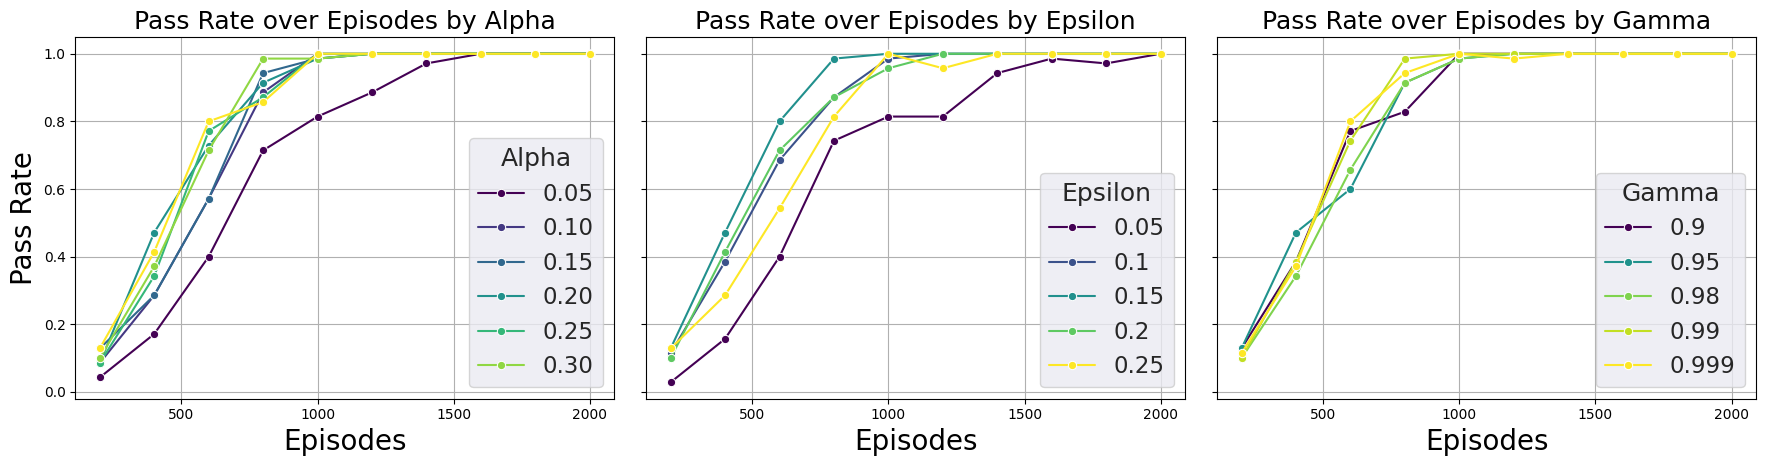

{'episodes': 1000, 'alpha': 0.1, 'gamma': 0.9, 'epsilon': 0.15, 'pass_rate': 1.0}


<Figure size 640x480 with 0 Axes>

In [ ]:
from sarsa import sarsa

df = test_hyperparameters(env, 20, TuningParameters.sarsa, sarsa)
plot_hyperparameters(df, show=True)
print(extract_hyperparameters(df))


In [ ]:
from q_learning import q_learning

df = test_hyperparameters(env, 20, TuningParameters.q_learning, q_learning)
plot_hyperparameters(df, show=True)
print(extract_hyperparameters(df))

{'episodes': 600, 'alpha': 0.15, 'gamma': 0.9, 'epsilon': 0.2, 'pass_rate': 1.0}


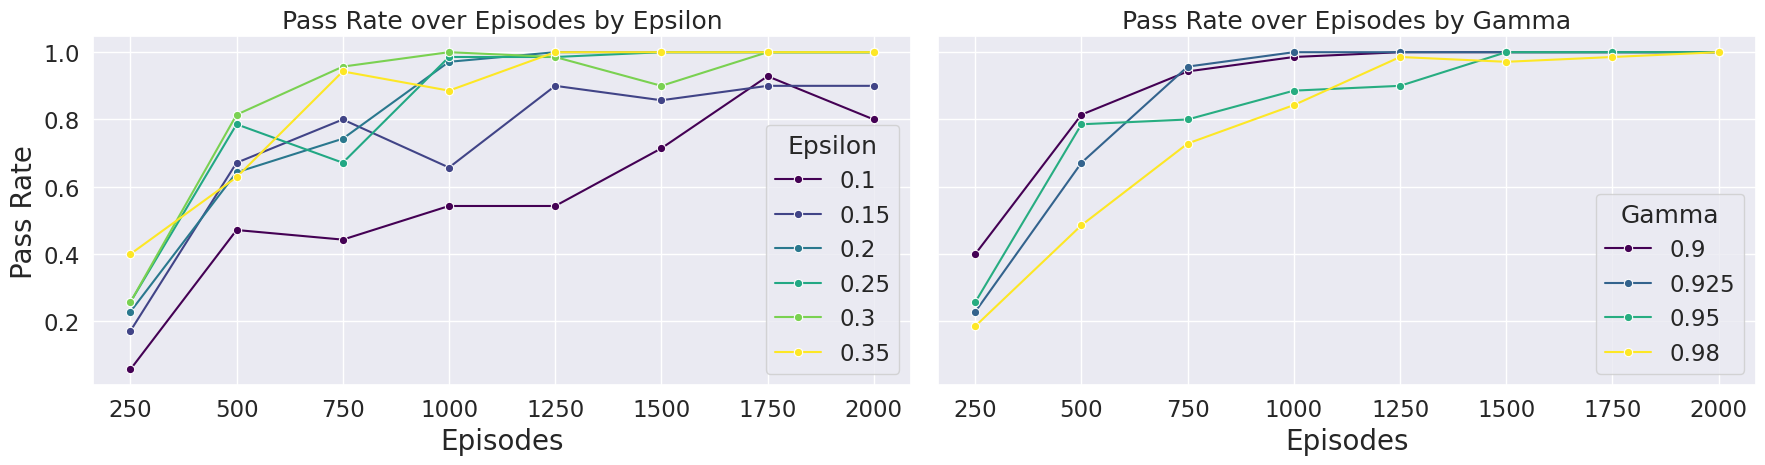

{'episodes': 1000, 'gamma': 0.925, 'epsilon': 0.3, 'pass_rate': 1.0}


<Figure size 640x480 with 0 Axes>

In [ ]:
from monte_carlo import mc_epsilon_greedy

df = test_hyperparameters(env, 20, TuningParameters.mc_epsilon_greedy, mc_epsilon_greedy)
plot_hyperparameters(df, show=True)
print(extract_hyperparameters(df))
# 